# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [8]:
import os
import keras


import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
"""
Set your required experiment parameters
"""


## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [14]:

results = {}
 
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.

50000/50000 [==============================] - 2s 44us/step - loss: 1.1192 - acc: 0.6027 - val_loss: 1.4796 - val_acc: 0.4880
Epoch 28/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.1033 - acc: 0.6071 - val_loss: 1.4330 - val_acc: 0.5133
Epoch 29/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0947 - acc: 0.6125 - val_loss: 1.4605 - val_acc: 0.4926
Epoch 30/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0691 - acc: 0.6207 - val_loss: 1.4636 - val_acc: 0.5007
Epoch 31/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0528 - acc: 0.6253 - val_loss: 1.4494 - val_acc: 0.5027
Epoch 32/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0383 - acc: 0.6295 - val_loss: 1.4635 - val_acc: 0.5138
Epoch 33/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.0234 - acc: 0.6356 - val_loss: 1.4607 - val_acc: 0.4935
Epoch 34/50
50000/50000 [=====================

Epoch 28/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 3s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50

50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [=======

50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 3s 55us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [=======

Epoch 29/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3881 - acc: 0.5133 - val_loss: 1.5134 - val_acc: 0.4580
Epoch 30/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3824 - acc: 0.5143 - val_loss: 1.5087 - val_acc: 0.4621
Epoch 31/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3725 - acc: 0.5183 - val_loss: 1.5111 - val_acc: 0.4558
Epoch 32/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3653 - acc: 0.5202 - val_loss: 1.5236 - val_acc: 0.4560
Epoch 33/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3538 - acc: 0.5250 - val_loss: 1.4276 - val_acc: 0.4920
Epoch 34/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3471 - acc: 0.5269 - val_loss: 1.4445 - val_acc: 0.4846
Epoch 35/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.3346 - acc: 0.5315 - val_loss: 1.4112 - val_acc: 0.4936
Epoch 36/50
50000/50000 [=========

Epoch 30/50
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50

50000/50000 [==============================] - 2s 48us/step - loss: 1.3913 - acc: 0.5053 - val_loss: 1.4934 - val_acc: 0.4692
Epoch 31/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3757 - acc: 0.5112 - val_loss: 1.4618 - val_acc: 0.4805
Epoch 32/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3642 - acc: 0.5166 - val_loss: 1.4855 - val_acc: 0.4708
Epoch 33/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3534 - acc: 0.5192 - val_loss: 1.4763 - val_acc: 0.4762
Epoch 34/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3419 - acc: 0.5247 - val_loss: 1.4867 - val_acc: 0.4718
Epoch 35/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3325 - acc: 0.5272 - val_loss: 1.4639 - val_acc: 0.4837
Epoch 36/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.3204 - acc: 0.5313 - val_loss: 1.4876 - val_acc: 0.4750
Epoch 37/50
50000/50000 [=====================

Epoch 31/50
50000/50000 [==============================] - 3s 56us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 35/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50

Epoch 32/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7684 - acc: 0.3854 - val_loss: 1.7691 - val_acc: 0.3877
Epoch 33/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7634 - acc: 0.3867 - val_loss: 1.7637 - val_acc: 0.3891
Epoch 34/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7585 - acc: 0.3893 - val_loss: 1.7577 - val_acc: 0.3916
Epoch 35/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7536 - acc: 0.3909 - val_loss: 1.7530 - val_acc: 0.3899
Epoch 36/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7491 - acc: 0.3913 - val_loss: 1.7501 - val_acc: 0.3887
Epoch 37/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7447 - acc: 0.3936 - val_loss: 1.7448 - val_acc: 0.3956
Epoch 38/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.7401 - acc: 0.3945 - val_loss: 1.7398 - val_acc: 0.3995
Epoch 39/50
50000/50000 [=========

50000/50000 [==============================] - 3s 50us/step - loss: 1.0067 - acc: 0.6390 - val_loss: 1.5345 - val_acc: 0.4881
Epoch 34/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.9925 - acc: 0.6445 - val_loss: 1.6901 - val_acc: 0.4678
Epoch 35/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.9705 - acc: 0.6523 - val_loss: 1.6254 - val_acc: 0.4936
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9590 - acc: 0.6567 - val_loss: 1.6759 - val_acc: 0.4811
Epoch 37/50
50000/50000 [==============================] - 3s 50us/step - loss: 0.9406 - acc: 0.6612 - val_loss: 1.7513 - val_acc: 0.4813
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9207 - acc: 0.6683 - val_loss: 1.7875 - val_acc: 0.4802
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.9147 - acc: 0.6725 - val_loss: 1.7075 - val_acc: 0.4818
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 1.3243 - acc: 0.5386 - val_loss: 1.4100 - val_acc: 0.5024
Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3173 - acc: 0.5407 - val_loss: 1.4403 - val_acc: 0.4893
Epoch 36/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.3120 - acc: 0.5419 - val_loss: 1.3966 - val_acc: 0.5050
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3065 - acc: 0.5445 - val_loss: 1.3991 - val_acc: 0.5092
Epoch 38/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.3019 - acc: 0.5459 - val_loss: 1.3951 - val_acc: 0.5073
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.2975 - acc: 0.5482 - val_loss: 1.4204 - val_acc: 0.4941
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2921 - acc: 0.5511 - val_loss: 1.3867 - val_acc: 0.5081
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 55us/step - loss: 0.8615 - acc: 0.6937 - val_loss: 1.5128 - val_acc: 0.5204
Epoch 36/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.8443 - acc: 0.6984 - val_loss: 1.5541 - val_acc: 0.5182
Epoch 37/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8195 - acc: 0.7081 - val_loss: 1.5118 - val_acc: 0.5296
Epoch 38/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.8096 - acc: 0.7104 - val_loss: 1.5109 - val_acc: 0.5203
Epoch 39/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.7866 - acc: 0.7195 - val_loss: 1.5975 - val_acc: 0.5129
Epoch 40/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7852 - acc: 0.7205 - val_loss: 1.5995 - val_acc: 0.5179
Epoch 41/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.7674 - acc: 0.7280 - val_loss: 1.6330 - val_acc: 0.5172
Epoch 42/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 2.0537 - acc: 0.2783 - val_loss: 2.0541 - val_acc: 0.2762
Epoch 37/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.0496 - acc: 0.2803 - val_loss: 2.0501 - val_acc: 0.2766
Epoch 38/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.0456 - acc: 0.2811 - val_loss: 2.0462 - val_acc: 0.2773
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.0417 - acc: 0.2834 - val_loss: 2.0424 - val_acc: 0.2789
Epoch 40/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.0380 - acc: 0.2831 - val_loss: 2.0387 - val_acc: 0.2810
Epoch 41/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.0343 - acc: 0.2849 - val_loss: 2.0351 - val_acc: 0.2815
Epoch 42/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0307 - acc: 0.2851 - val_loss: 2.0316 - val_acc: 0.2831
Epoch 43/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 50us/step - loss: 1.0872 - acc: 0.6231 - val_loss: 1.3676 - val_acc: 0.5194
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.0780 - acc: 0.6251 - val_loss: 1.4643 - val_acc: 0.4906
Epoch 39/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.0596 - acc: 0.6302 - val_loss: 1.4349 - val_acc: 0.5141
Epoch 40/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.0535 - acc: 0.6334 - val_loss: 1.3296 - val_acc: 0.5301
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0414 - acc: 0.6375 - val_loss: 1.3581 - val_acc: 0.5279
Epoch 42/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0337 - acc: 0.6409 - val_loss: 1.3922 - val_acc: 0.5089
Epoch 43/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0235 - acc: 0.6422 - val_loss: 1.4291 - val_acc: 0.5153
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 1.6707 - acc: 0.4231 - val_loss: 1.6750 - val_acc: 0.4197
Epoch 39/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6684 - acc: 0.4243 - val_loss: 1.6733 - val_acc: 0.4211
Epoch 40/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6661 - acc: 0.4251 - val_loss: 1.6719 - val_acc: 0.4190
Epoch 41/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6643 - acc: 0.4256 - val_loss: 1.6692 - val_acc: 0.4223
Epoch 42/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6622 - acc: 0.4261 - val_loss: 1.6675 - val_acc: 0.4226
Epoch 43/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6601 - acc: 0.4255 - val_loss: 1.6657 - val_acc: 0.4216
Epoch 44/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6582 - acc: 0.4261 - val_loss: 1.6639 - val_acc: 0.4226
Epoch 45/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 56us/step - loss: 0.9283 - acc: 0.6792 - val_loss: 1.3236 - val_acc: 0.5434
Epoch 40/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.9087 - acc: 0.6886 - val_loss: 1.3570 - val_acc: 0.5341
Epoch 41/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.9058 - acc: 0.6882 - val_loss: 1.3302 - val_acc: 0.5440
Epoch 42/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.8919 - acc: 0.6932 - val_loss: 1.3429 - val_acc: 0.5382
Epoch 43/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.8748 - acc: 0.7000 - val_loss: 1.3467 - val_acc: 0.5427
Epoch 44/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.8652 - acc: 0.7021 - val_loss: 1.3405 - val_acc: 0.5442
Epoch 45/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.8509 - acc: 0.7078 - val_loss: 1.3708 - val_acc: 0.5379
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 47us/step - loss: 2.2600 - acc: 0.1750 - val_loss: 2.2597 - val_acc: 0.1763
Epoch 41/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.2588 - acc: 0.1765 - val_loss: 2.2585 - val_acc: 0.1776
Epoch 42/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2576 - acc: 0.1779 - val_loss: 2.2574 - val_acc: 0.1802
Epoch 43/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2565 - acc: 0.1791 - val_loss: 2.2562 - val_acc: 0.1816
Epoch 44/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2553 - acc: 0.1798 - val_loss: 2.2551 - val_acc: 0.1830
Epoch 45/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2542 - acc: 0.1814 - val_loss: 2.2539 - val_acc: 0.1844
Epoch 46/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2531 - acc: 0.1825 - val_loss: 2.2528 - val_acc: 0.1855
Epoch 47/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 1.4392 - acc: 0.5010 - val_loss: 1.4829 - val_acc: 0.4770
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.4340 - acc: 0.5020 - val_loss: 1.4778 - val_acc: 0.4805
Epoch 43/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.4289 - acc: 0.5043 - val_loss: 1.4780 - val_acc: 0.4744
Epoch 44/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.4242 - acc: 0.5042 - val_loss: 1.4760 - val_acc: 0.4793
Epoch 45/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.4192 - acc: 0.5079 - val_loss: 1.4742 - val_acc: 0.4749
Epoch 46/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.4149 - acc: 0.5080 - val_loss: 1.4656 - val_acc: 0.4810
Epoch 47/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.4114 - acc: 0.5091 - val_loss: 1.4647 - val_acc: 0.4826
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 52us/step - loss: 1.9936 - acc: 0.3032 - val_loss: 1.9930 - val_acc: 0.3053
Epoch 43/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9916 - acc: 0.3039 - val_loss: 1.9911 - val_acc: 0.3063
Epoch 44/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9897 - acc: 0.3053 - val_loss: 1.9893 - val_acc: 0.3074
Epoch 45/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9878 - acc: 0.3058 - val_loss: 1.9874 - val_acc: 0.3078
Epoch 46/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9860 - acc: 0.3071 - val_loss: 1.9856 - val_acc: 0.3094
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9842 - acc: 0.3076 - val_loss: 1.9839 - val_acc: 0.3100
Epoch 48/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9825 - acc: 0.3087 - val_loss: 1.9822 - val_acc: 0.3113
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 56us/step - loss: 1.3890 - acc: 0.5183 - val_loss: 1.4483 - val_acc: 0.4915
Epoch 44/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.3845 - acc: 0.5206 - val_loss: 1.4512 - val_acc: 0.4893
Epoch 45/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3805 - acc: 0.5205 - val_loss: 1.4493 - val_acc: 0.4925
Epoch 46/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.3748 - acc: 0.5228 - val_loss: 1.4392 - val_acc: 0.4962
Epoch 47/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.3701 - acc: 0.5249 - val_loss: 1.4370 - val_acc: 0.4963
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.3639 - acc: 0.5272 - val_loss: 1.4293 - val_acc: 0.4999
Epoch 49/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.3600 - acc: 0.5276 - val_loss: 1.4313 - val_acc: 0.4936
Epoch 50/50
50000/50000 [=====================

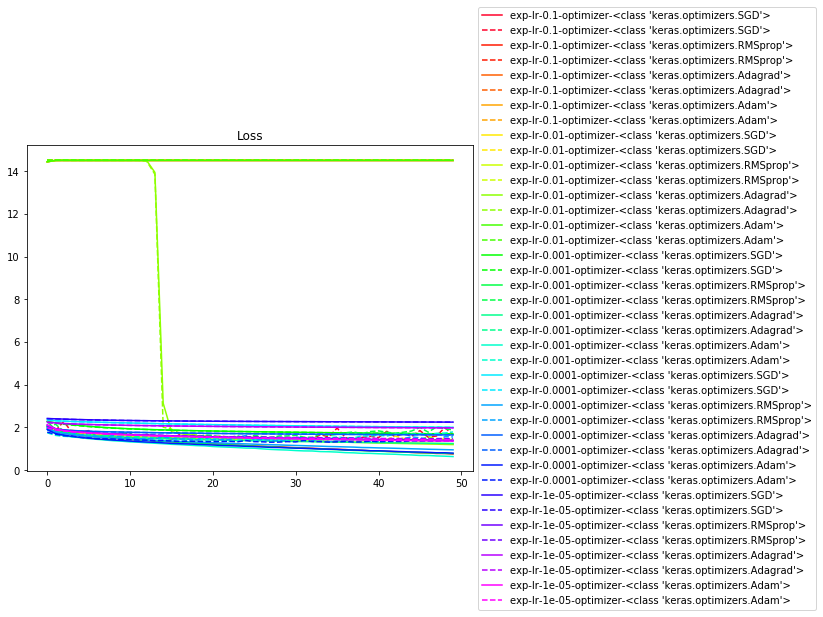

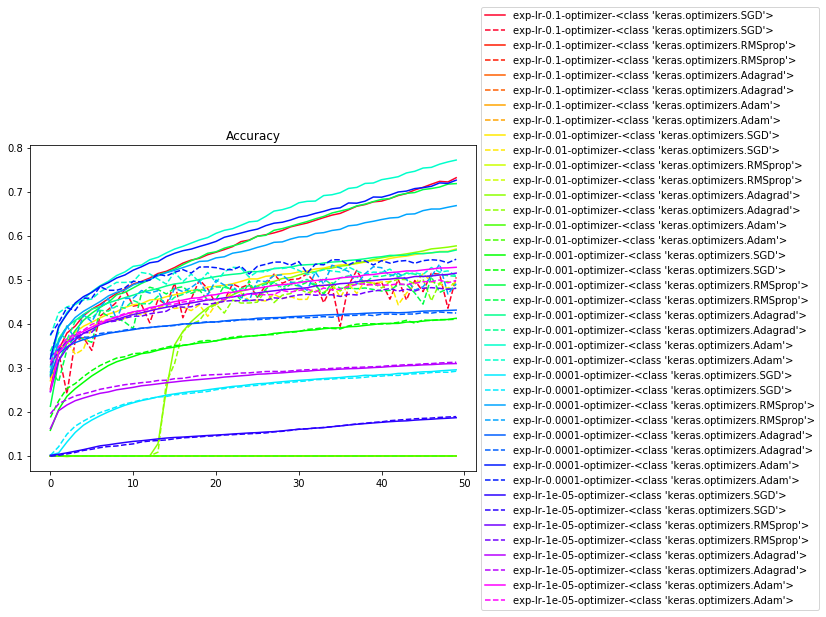

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()